In [1]:
import re
filePath= "F:/Amrita Mtech/Glisten Internship/Work/Travel Book/Sinhagad Wiki Text.txt"

with open(filePath, "r")as myfile:
    data= myfile.read()

#get data from txt file
file = open(filePath, "r")
doclist = [ line for line in file ]
docstr = '' . join(doclist)
sentences = re.split(r'[.!?]', docstr)
    
for i, sentence in enumerate(sentences):
        tokenized= []
        for word in sentence.split(' '):
                word = word.split('.')[0]
                word = word.lower()
                tokenized.append(word)
        sentences[i] = tokenized
print("Number of sentences are: ", len(sentences))      
print("\n The sentence vector is: ")
print(sentences)

Number of sentences are:  61

 The sentence vector is: 
[['sinhagad', 'is', 'a', 'hill', 'fortress', 'located', 'at', 'around', '35', 'km', 'southwest', 'of', 'the', 'city', 'of', 'pune,', 'india'], ['', 'some', 'of', 'the', 'information', 'available', 'at', 'this', 'fort', 'suggests', 'that', 'the', 'fort', 'could', 'have', 'been', 'built', '2000', 'years', 'ago'], ['', 'the', 'caves', 'and', 'the', 'carvings', 'in', 'the', 'kaundinyeshwar', 'temple', 'stand', 'as', 'proofs', 'for', 'the', 'same'], ['previously', 'known', 'as', 'kondhana,', 'the', 'fort', 'had', 'been', 'the', 'site', 'of', 'many', 'battles,', 'most', 'notably', 'the', 'battle', 'of', 'sinhagad', 'in', '1670'], ['', 'perched', 'on', 'an', 'isolated', 'cliff', 'of', 'the', 'bhuleswar', 'range', 'in', 'the', 'sahyadri', 'mountains,', 'the', 'fort', 'is', 'situated', 'on', 'a', 'hill', 'about', '760', 'metres', 'above', 'ground', 'and', '1,312', 'metres', 'above', 'mean', 'sea', 'level'], ['the', 'sinhagad', "(lion's", '

In [9]:
from gensim.models import word2vec
#Creation of word vector
model = word2vec.Word2Vec(sentences,min_count=1)
#print(model.wv.__getitem__("sinhagad"))
#print(model['sinhagad'])
len(model.wv.vocab)

520

In [12]:
#For averaging
import numpy as np

def buildWordVector(text):
    ##vec = np.zeros(size).reshape((1, size))
    vec=0
    count = 0
    for word in text:
        #vec =vec + model[word].reshape((1, size))
        vec =vec + model[word]
        count =count+ 1.

    if count != 0:
        vec =vec/count
    return vec

arrays = []
for sentence in sentences:
    arrays.append(buildWordVector(sentence))
print(arrays)
print(len(arrays))

[array([-1.5507602e-03,  5.1343604e-04, -1.8989794e-03, -1.6327810e-03,
       -7.8653946e-04, -6.4202870e-04, -7.8057659e-05,  6.0001720e-04,
       -9.0517872e-04, -5.1120453e-04,  2.4633773e-04, -1.1714960e-03,
        5.8978598e-04,  4.0496304e-04, -3.8112680e-04, -1.3683820e-03,
        3.4929655e-04, -1.6821058e-03, -3.7919730e-04,  2.0648225e-04,
       -7.0333766e-04,  9.0140157e-04, -1.0094459e-03, -2.8332890e-04,
        9.7432919e-04, -6.6201342e-04,  1.4641489e-03,  4.8234040e-05,
        2.3625638e-04,  7.1506191e-04, -1.6000911e-03,  1.0250410e-03,
       -1.2447841e-04,  1.3137312e-03, -1.3884177e-03,  6.1711576e-04,
       -8.8564289e-04, -1.4794193e-03,  1.1976259e-03, -7.7820133e-04,
       -1.4740167e-03,  1.3266665e-04, -2.4386719e-04, -1.7730601e-04,
        1.0061304e-03, -6.6995382e-04,  7.0871250e-04,  5.0726091e-04,
        3.8279362e-05, -1.7839904e-03, -2.3969980e-04,  1.4891986e-04,
       -4.3791614e-04, -3.4814430e-04, -1.2416900e-03,  7.9379883e-05,
     

c:\python37\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.


In [13]:
#Cosine simillarities: 61X61
from sklearn.metrics.pairwise import cosine_similarity
from scipy import sparse

A_sparse = sparse.csr_matrix(arrays)

similarities = cosine_similarity(A_sparse)
print('pairwise dense output:\n {}\n'.format(similarities))


pairwise dense output:
 [[0.9999999  0.46500203 0.3658318  ... 0.47917193 0.41481462 0.11799106]
 [0.46500203 0.99999994 0.4937545  ... 0.5658109  0.5350185  0.2685049 ]
 [0.3658318  0.4937545  0.99999976 ... 0.6427053  0.6726245  0.25909752]
 ...
 [0.47917193 0.5658109  0.6427053  ... 1.         0.53746504 0.24069262]
 [0.41481462 0.5350185  0.6726245  ... 0.53746504 1.         0.24578741]
 [0.11799106 0.2685049  0.25909752 ... 0.24069262 0.24578741 1.        ]]



In [14]:
import pandas as pd
import openpyxl

filepath2="F:/Amrita Mtech/Glisten Internship/Work/Travel Book/Similaries.xlsx"

df=pd.DataFrame(data=similarities)
#df.append(similarities)
print(df)

df.to_excel(filepath2)

          0         1         2         3         4         5         6   \
0   1.000000  0.465002  0.365832  0.522766  0.442083  0.146956  0.252086   
1   0.465002  1.000000  0.493755  0.613789  0.458804  0.287924  0.473553   
2   0.365832  0.493755  1.000000  0.503570  0.530416  0.414493  0.593280   
3   0.522766  0.613789  0.503570  1.000000  0.462552  0.123663  0.405144   
4   0.442083  0.458804  0.530416  0.462552  1.000000  0.238188  0.333539   
5   0.146956  0.287924  0.414493  0.123663  0.238188  1.000000  0.225190   
6   0.252086  0.473553  0.593280  0.405144  0.333539  0.225190  1.000000   
7   0.317481  0.448060  0.625394  0.414763  0.441038  0.193101  0.475397   
8   0.491686  0.658009  0.598392  0.545734  0.601685  0.337375  0.473614   
9   0.324400  0.411346  0.565162  0.488940  0.396329  0.299871  0.366004   
10  0.401087  0.618539  0.739956  0.562025  0.522862  0.466776  0.584215   
11  0.233587  0.302046  0.504616  0.201260  0.464811  0.313831  0.334911   
12  0.493336

In [19]:
#Timeline
import re
timeline=[]
for sentence in sentences:
    for l in sentence:
        match = re.match(r'.*([1-3][0-9]{3})', l)
        if match is not None:
            #print (match.group(1))
            timeline.append(match.group(1))
            
print(timeline)

['2000', '1670', '1328', '1647', '1649', '1656', '1662', '1663', '1665', '1664', '1665', '1670', '1689', '1693', '1700', '1703', '1706', '1818', '1670', '1950', '2019']


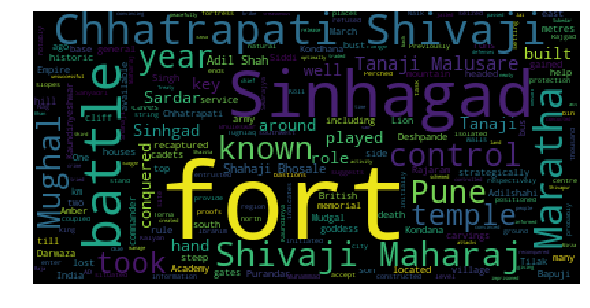

In [17]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt 

def create_word_cloud(data):
    wordcloud = WordCloud().generate(data) 
    # plot the WordCloud image                        
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.show() 

create_word_cloud(data)

 some of the information available at this fort suggests that the fort could have been built 2000 years ago


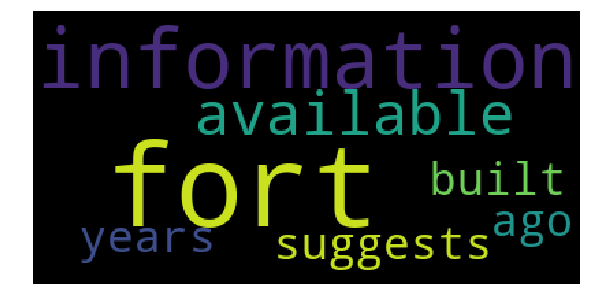

previously known as kondhana, the fort had been the site of many battles, most notably the battle of sinhagad in 1670


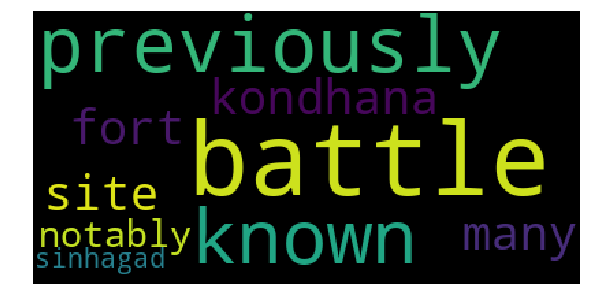

 it was seized by muhammad bin tughlaq from the koli king nag naik in 1328 ad


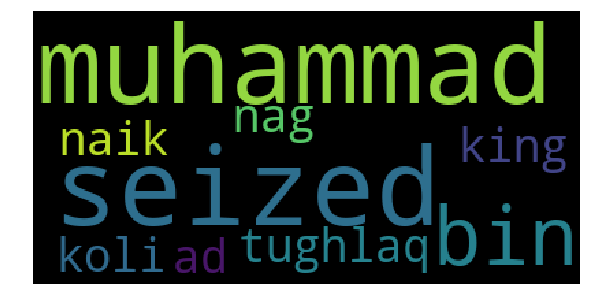

 chhatrapati shivaji maharaj gained control of kondana in 1647 by convincing siddi amber, the adilshahi sardar who controlled the fort, that he, the son of shahaji bhosale, could manage the fort's defenses optimally


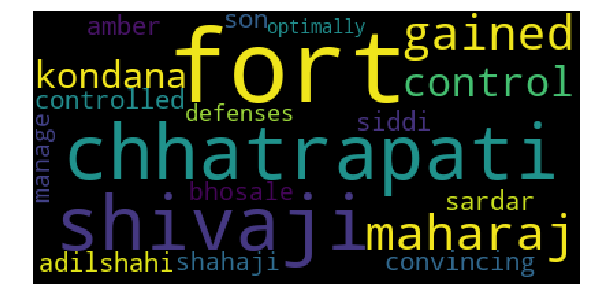

 chhatrapati shivaji maharaj recaptured it in 1656 again with the help of bapuji mudgal deshpande who convinced the fort commander by giving land in the newly created shivapur village and peacefully gained control of the fort


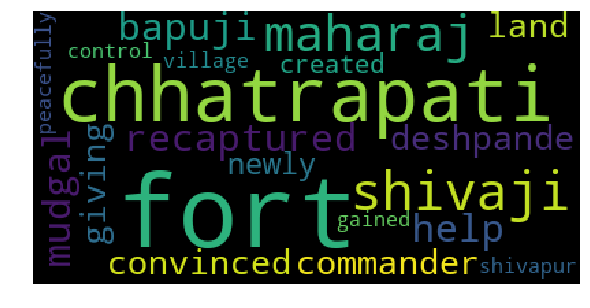

this fort saw attacks by mughals in 1662, 1663 and 1665


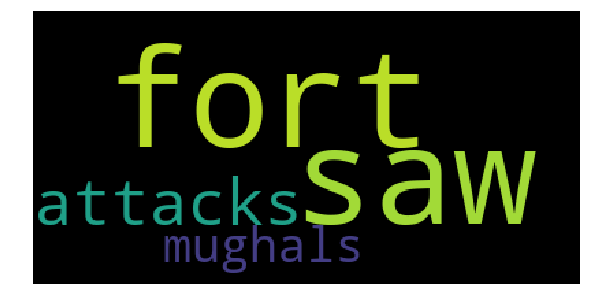

this fort saw attacks by mughals in 1662, 1663 and 1665 through the treaty of purandar, the fort passed into the hands of the mughal army chief mirza raja jai singh i in the year 1665


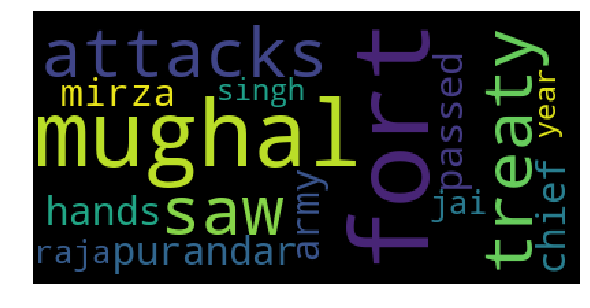

this fort saw attacks by mughals in 1662, 1663 and 1665 through the treaty of purandar, the fort passed into the hands of the mughal army chief mirza raja jai singh i in the year 1665


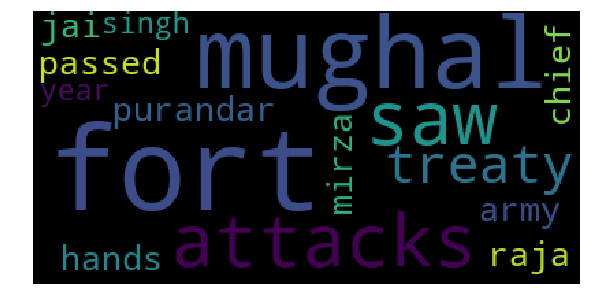

previously known as kondhana, the fort had been the site of many battles, most notably the battle of sinhagad in 1670


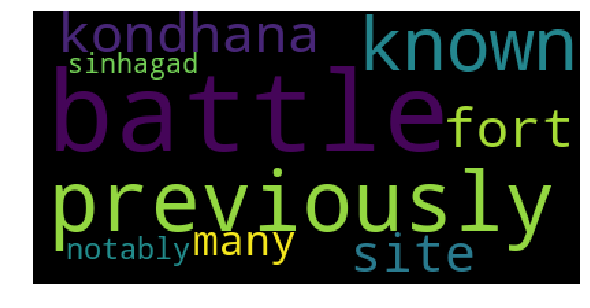

in 1670, chhatrapati shivaji maharaj reconquered the fort for the third time through his subedar, tanhaji malusare, and the fort came and stayed under the maratha rule till 1689 a


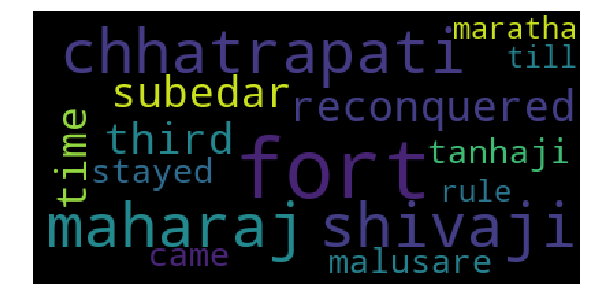

 the marathas headed by "sardar balkawade", recaptured it in 1693


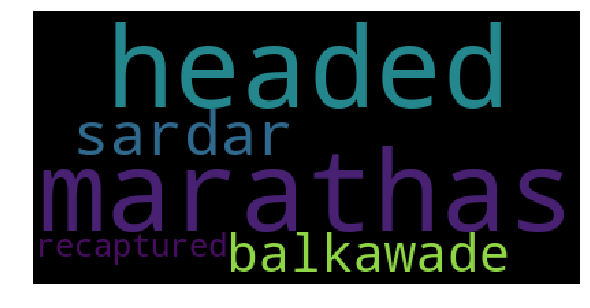

 chatrapati rajaram took asylum in this fort during a mogul raid on satara but died in the sinhagad fort on 3 march 1700 a


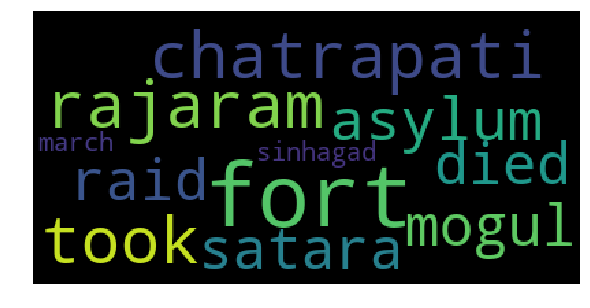

previously known as kondhana, the fort had been the site of many battles, most notably the battle of sinhagad in 1670


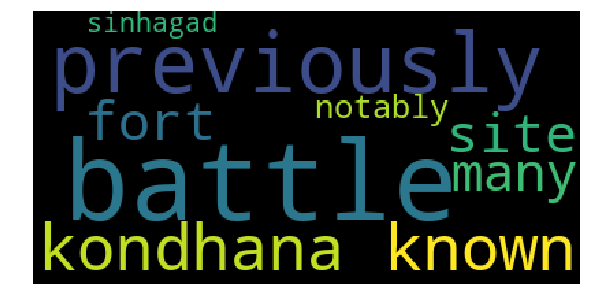

 the original commemorative memorial of tanaji malusare has been unearthed by the restoration workers at sinhagad fort in feb 2019


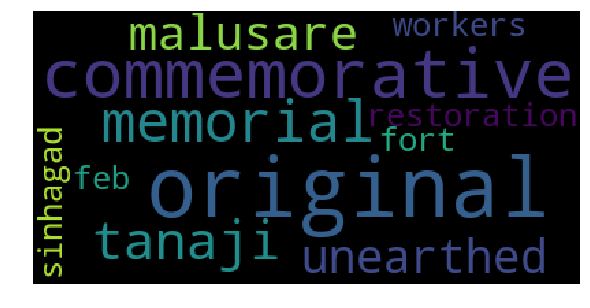

In [20]:
for time in timeline:
    data2=[]
    for sentence in sentences:
        if time in sentence:
            data2.append(sentence)
    if (len(data2)>0):
        data3=[ item for elem in data2 for item in elem]
        listToStr = ' '.join([str(elem) for elem in data3]) 
        print(listToStr) 
        create_word_cloud(listToStr)